<a href="https://colab.research.google.com/github/sanyagoyal2000/Youtube--Transcript-Summarizer/blob/main/transcript_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q transformers

In [13]:
!pip install -q youtube_transcript_api

In [14]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [20]:
youtube_video="https://www.youtube.com/watch?v=IYJimI0TtaM"

In [21]:
video_id=youtube_video.split("=")[1]

In [22]:
video_id

'IYJimI0TtaM'

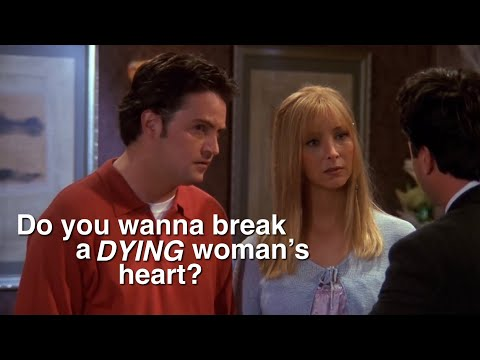

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [25]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript=YouTubeTranscriptApi.get_transcript(video_id)

In [26]:
transcript

[{'duration': 3.6,
  'start': 0.0,
  'text': "hey chandler why it's so fancy well i"},
 {'duration': 3.359,
  'start': 1.92,
  'text': "got a job interview it's kind of a big"},
 {'duration': 3.279,
  'start': 3.6,
  'text': "deal too it's a lot more money and i'd"},
 {'duration': 2.801,
  'start': 5.279,
  'text': 'be doing data reconfiguration and'},
 {'duration': 2.64, 'start': 6.879, 'text': 'statistical factoring'},
 {'duration': 5.2,
  'start': 8.08,
  'text': 'wait i think i know someone who does'},
 {'duration': 3.761, 'start': 9.519, 'text': 'that me i do that'},
 {'duration': 5.76, 'start': 13.84, 'text': 'can you hear that yeah'},
 {'duration': 3.289, 'start': 17.83, 'text': '[Applause]'},
 {'duration': 3.759,
  'start': 19.6,
  'text': "see that'll stop when you pick up the"},
 {'duration': 2.24, 'start': 21.119, 'text': 'phone'},
 {'duration': 6.719, 'start': 24.4, 'text': "oh i'm on bye-bye bye chandler"},
 {'duration': 4.559, 'start': 27.84, 'text': 'i miss you already'}

In [27]:
transcript[0:5]

[{'duration': 3.6,
  'start': 0.0,
  'text': "hey chandler why it's so fancy well i"},
 {'duration': 3.359,
  'start': 1.92,
  'text': "got a job interview it's kind of a big"},
 {'duration': 3.279,
  'start': 3.6,
  'text': "deal too it's a lot more money and i'd"},
 {'duration': 2.801,
  'start': 5.279,
  'text': 'be doing data reconfiguration and'},
 {'duration': 2.64, 'start': 6.879, 'text': 'statistical factoring'}]

In [32]:
result=""
for i in transcript:
  result+=' ' + i['text']
print(len(result))

4539


In [33]:
summarizer=pipeline('summarization')

In [34]:
num_iters=int(len(result)/1000)
summarized_text=[]
for i in range(0,num_iters+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  out=summarizer(result[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)
print(summarized_text)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
Your max_length is set to 142, but you input_length is only 128. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[" i got a job interview it's kind of a big deal too it's a lot more money and i'd be doing data reconfiguration and statistical factoring . i miss you already you don't make a very good first impression, says chandler . i'm sorry he's in a meeting right now will he know what this is in reference to andy has your number all right .", " [Music] What i thought you knew that no who doesn't like me everyone except for um no everyone . a couple of weeks all right what do we do now well now i actually have to get to work most likely how long before you have to leave an hour i can't help you oh you're going i'm not without you lover bye bye .", ' "It was really hard oh yeah the hug looked pretty brutal okay you weren\'t there can i help you uh yeah yes i would like to see that ring please or not whatever this ring is from the 1920s it\'s a one and a half carat diamond with sapphires on either side . "It\'s just like pulling off a band-aid okay just do it really fast"', ' The hardest thing i\'

In [36]:
len(str(summarized_text))

1529